# Titanic Project

## Import the necessary libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Getting the data

In [2]:
# Generating the training set

df_train = pd.read_csv('train.csv')

df_train.drop('Name', axis=1, inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Generating the test set

df_test = pd.read_csv('test.csv')

df_test.drop('Name', axis=1, inplace=True)

df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring the Data

### Evaluation of Datatypes

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
df_train.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [7]:
dtypes_list = list(df_train.dtypes.unique())

for data_type in dtypes_list:
    cols = df_train.select_dtypes(include=[data_type]).columns
    print(f'{data_type}: {list(cols)}')

int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
object: ['Sex', 'Ticket', 'Cabin', 'Embarked']
float64: ['Age', 'Fare']


### Evaluation of missing values

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### View Distribution

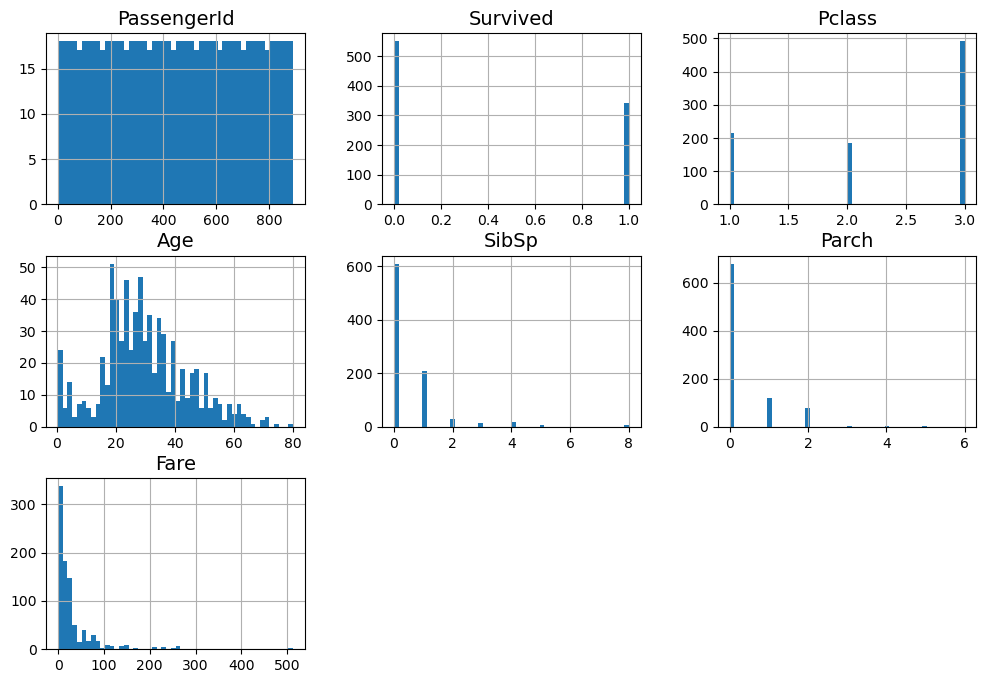

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

distrib_plot = df_train.hist(bins=50, figsize=(12, 8))
plt.show()

### Visualizing the Data

In [11]:
# View the unique column elements that can be used to countplot

# Using for loops
for columns in df_train.columns:
    if len(df_train[columns].unique()) <= 10:
        print(columns)
        
# Using list comprehension
cat_cols_list = [columns for columns in df_train.columns if len(df_train[columns].unique()) <= 10]

Survived
Pclass
Sex
SibSp
Parch
Embarked


In [12]:
for number, col in enumerate(df_train.columns):
    print(f'{number}, {col}')

0, PassengerId
1, Survived
2, Pclass
3, Sex
4, Age
5, SibSp
6, Parch
7, Ticket
8, Fare
9, Cabin
10, Embarked


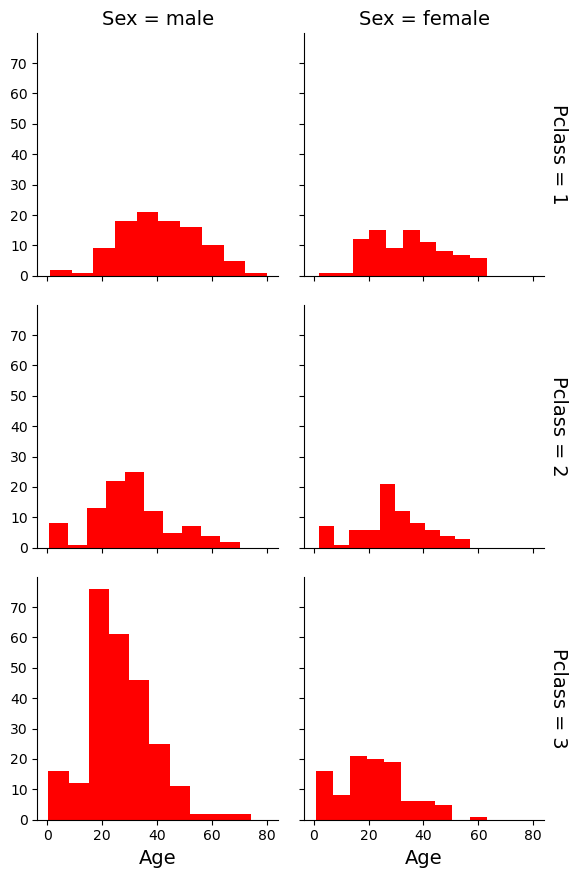

In [16]:
plot_params = {'data':               df_train,
               'row':               'Pclass',
               'column':            'Sex',
               'hist_basis':        'Age',
               'color':             'red'}

def cat_countplot(data, row, column, hist_basis, color):
    hist_plot = sns.FacetGrid(data, 
                              margin_titles=True,
                              col=column, row=row)
    hist_plot.map(plt.hist, hist_basis, color=color)
    return plt.show()
    
cat_countplot(**plot_params)

### Study the correlations

In [20]:
sorted_correlation_params = {'data': df_train, 
                             'target': 'Survived', 
                             'correl_method': 'pearson'}

def sorted_correlation(data, target, correl_method):
                             
    # Convert categorical values to numeric
    le = LabelEncoder()
    data[target] = le.fit_transform(data[target])
  
    # Create correlation matrix
    corr_mat = data.corr(method=correl_method)
  
    # Retain upper triangular values of correlation matrix and
    # make Lower triangular values Null
    upper_corr_mat = corr_mat.where(
        np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
    # Convert to 1-D series and drop Null values
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
    # Sort correlation pairs
    sorted_mat = unique_corr_pairs.sort_values()

    return sorted_mat

sorted_correlation(**sorted_correlation_params)

Fare      Pclass        -0.549500
Age       Pclass        -0.369226
Pclass    Survived      -0.338481
SibSp     Age           -0.308247
Parch     Age           -0.189119
Age       Survived      -0.077221
SibSp     PassengerId   -0.057527
          Survived      -0.035322
Pclass    PassengerId   -0.035144
Survived  PassengerId   -0.005007
Parch     PassengerId   -0.001652
Fare      PassengerId    0.012658
Parch     Pclass         0.018443
Age       PassengerId    0.036847
Parch     Survived       0.081629
SibSp     Pclass         0.083081
Fare      Age            0.096067
          SibSp          0.159651
          Parch          0.216225
          Survived       0.257307
Parch     SibSp          0.414838
dtype: float64

It appears that there is not much significant correlation in the dataset

### Applying Data Transformations

In [21]:
df_train_mod = df_train.copy()

In [30]:
df_train_mod['companions'] = df_train_mod['SibSp'] + df_train_mod['Parch']
df_train_mod['price per head'] = df_train_mod['Fare'] / df_train_mod['companions']

In [31]:
df_train_mod.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,companions,price per head
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.2500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,inf
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,53.1000
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,inf


In [25]:
df_train_mod['companions'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: companions, dtype: int64

In [29]:
df_train_mod['Fare'].sort_values(ascending=False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64